In [1]:
from shapely import Polygon

from SLS_section_response import (
    calculate_cracking_moment,
    calculate_strain_profile,
    calculate_width_at_z,
    effective_depth,
    calculate_cracking_moment
)
from structuralcodes.geometry import SurfaceGeometry
from structuralcodes.materials.concrete import ConcreteEC2_2004
from structuralcodes.materials.reinforcement import ReinforcementEC2_2004
from structuralcodes.plots.section_plots import draw_section_response,draw_section,get_stress_point
from structuralcodes.sections._generic import GenericSection
from structuralcodes.sections._reinforcement import add_reinforcement_line
import structuralcodes.codes as codes
import structuralcodes.materials as materials
from shapely import Polygon


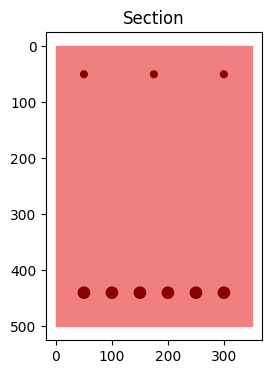

In [2]:

codes.set_design_code(design_code='ec2_2004') 
# Create materials
concrete = materials.concrete.create_concrete(fck=25)
reinforcemnet = materials.reinforcement.create_reinforcement(fyk=500,Es=200000,
    density=7850,
    ftk=500,
    epsuk=0.07,)
# Create section
poly = Polygon(((0, 0), (350, 0), (350, 500), (0, 500)))
geo = SurfaceGeometry(poly, concrete)
geo = add_reinforcement_line(geo, (50, 50), (300, 50), 12, reinforcemnet, n=3)
geo = add_reinforcement_line(
    geo, (50, 440), (300, 440), 20, reinforcemnet, n=6
)
sec = GenericSection(geo)

draw_section(sec)

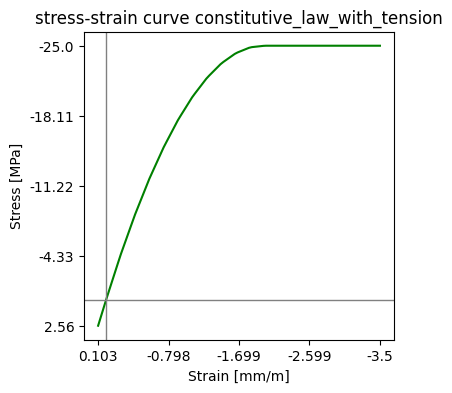

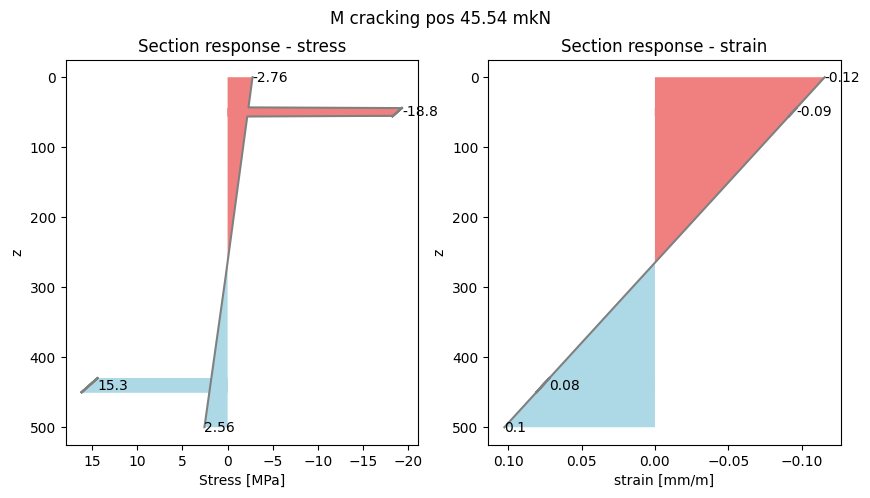

z neutral axis = 264.98


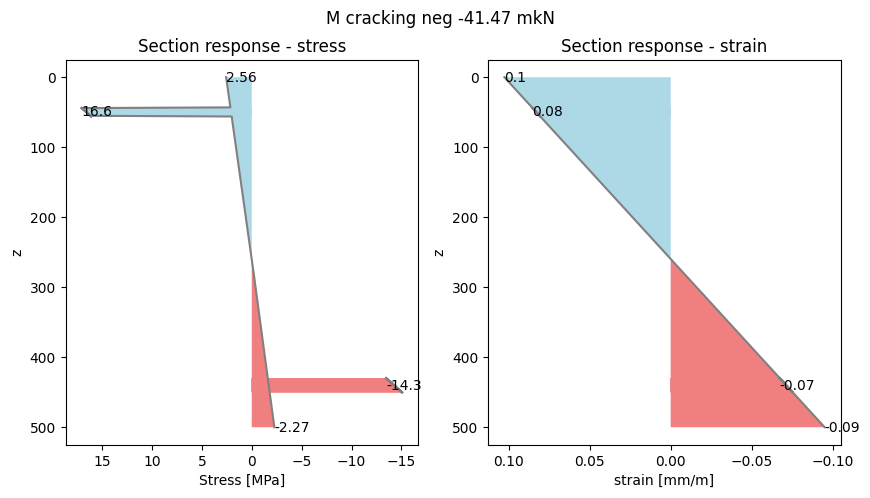

z neutral axis = 259.63
M crackin +  =  45.53803549940075
M crackin -  =  -41.46655450760487


In [21]:
# Cracking moment
Mcrpos, Mcr_neg = calculate_cracking_moment(sec,0,True)
print('M crackin +  = ', Mcrpos/1e6)
print('M crackin -  = ', Mcr_neg/1e6)

In [4]:
# effective d
d_pos = effective_depth(sec, neg_bending=False)
d_neg = effective_depth(sec, neg_bending=True)
print('d for M+  = ', d_pos)
print('d for M-  = ', d_neg)

na.  444.7482387270205
na.  444.7482387270205
d for M+  =  440.00000000000006
d for M-  =  450.0


In [5]:
# width at z value
b1 = calculate_width_at_z(sec,0)
print(b1)
b2 = calculate_width_at_z(sec,500)
print(b2)
b3 = calculate_width_at_z(sec,501)
print(b3)

350.0
350.0
0


-0.001059872232377529
5.620763725620456e-06


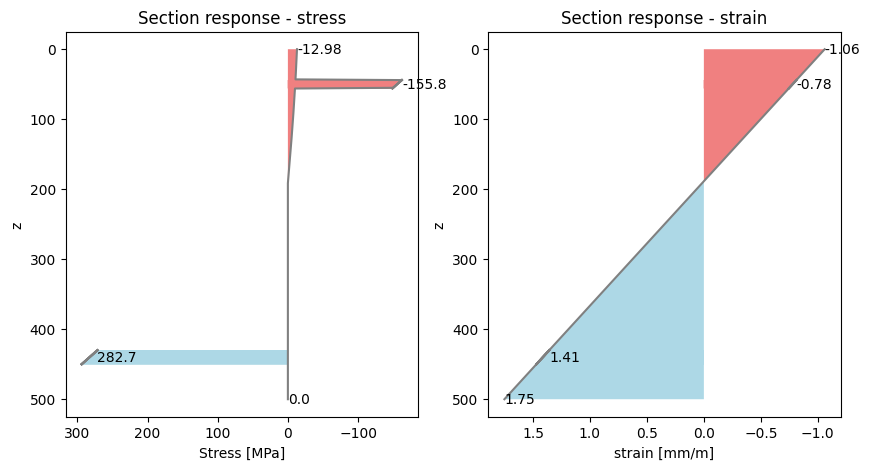

z neutral axis = 188.56


In [19]:
# calculate_strain_profile
N = 0 
M = 200 
eps_a, chi = calculate_strain_profile(sec,N*1e3,M*1e6)
print(eps_a)
print(chi)
draw_section_response(sec,eps_a,chi)

In [20]:
# get_stress_point
N = 0 
M = 200 
eps_a, chi = calculate_strain_profile(sec,N*1e3,M*1e6)
sigma = get_stress_point(sec,0,0,eps_a, chi,0)
print('sigma z=0 concrete =',sigma)
sigma = get_stress_point(sec,50,50,eps_a, chi,0)
print('sigma z=50 reinf =',sigma)
sigma = get_stress_point(sec,50,440,eps_a, chi,0)
print('sigma z=440 reinf =',sigma)


sigma z=0 concrete = -12.983999085604955
sigma z=50 reinf = -155.76680921930125
sigma z=440 reinf = 282.65276137909433
